# ***9. GLM, and General Non-linear Models**

GLM models are Generalized Linear Models. They extend the multiple regression model. The GAM
(Generalized Additive Model) model is a further extension.

# **9.1 A Taxonomy of Extensions to the Linear Model**


In R, you can extend the multiple linear regression model in several ways. This chapter explores different functional forms that go beyond the basic model.

The fundamental structure of the model is:
<p align="center">

**Observed value = Model Prediction + Statistical Error**

</p>
Typically, we assume that the statistical errors (denoted as \( $\epsilon$ \) in further discussion) follow an independent and identically distributed Normal distribution. However, R's capabilities include Generalized Linear Models and other extensions that accommodate a variety of non-normal distributions. In this section, our primary focus is on exploring different forms of the model prediction. We'll defer discussions about alternative distributions for the "error" component to later sections.


**_Multiple regression model_:**

<p align="center">
  $ y = \square  + \square_1 x_1 + \square_2 x_2 + ... + \square_p x_p + \square $
</p>
Use lm() to fit multiple regression models. The various other models we describe are, in essence,
generalizations of this model.


**_Generalized Linear Model(e.g. logit model)_:**

$ y = g(a + b_1 x_1) + \square $

here (.) is selected from one of a small number of options.
For logit models, $y = \pi + \epsilon $, where

<p align = "center">
 $$ \log\left(\frac{\pi}{1 - \pi}\right) = a + b_1 x_1 $$
</p>

here $\square $ is an expected proportion, and

<p align="center">
  $$ \log\left(\frac{\pi}{1 - \pi}\right) = \text{logit}(\pi) $$
 is log(odds) .
</p>

we can turn this model around, and write

<p align="center">
 $$ y = g(a + b_1 x_1) + \epsilon = \frac{\exp(a + b_1 x_1)}{1 + \exp(a + b_1 x_1)} + \epsilon $$
</p>

here g(.) undoes the logit transformation.
we can add more explanatory variables : $ a + b_1 x_1 + .. + b_p x_p $ .

Use glm() to fit generalized models.

**_Additive Models_:**

$ y = \phi_1 (x_1) + \phi_2 (x_2) + ... + \phi_p (x_p) + \epsilon $

Additive models are a genralization of lm models. In 1 dimension $ y= \phi_1 (x_1) + \epsilon $

Some of $ z_1 = \phi_1 (x_1), z_2 = \phi_2 (x_2) , ... , z_p = \phi_p (x_p) $ may be somthing functions, while others may be the usual linear model terms. The comstant term gers absorbed into one or more of the $\phi s$.


**_Generalized Additive Model_:**

$ y = g(\phi_1(x_1) + \phi_2(x_2) + \ldots + \phi_p(x_p)) + \epsilon $

Generalized Additive Models are a generalization of Generalized Linear Models. For example, $ g(.) $ may be the function that undoes the logit transformation, as in a logistic regression model.

Some of $ z_1 = \phi_1(x_1), z_2 = \phi_2(x_2), \ldots, z_p = \phi_p(x_p) $ may be smoothing functions, while others may be the usual linear model terms.

We can transform to get the model:

$ y = g(z_1 + z_2 + \ldots + z_p) + \epsilon $

Notice that even if $ p = 1 $, we may still want to retain both $ \phi_1(.) $ and $ g(.) $, i.e.

$ y = g(\phi_1(x_1)) + \epsilon $

The reason is that $ g(.) $ is a specific function, such as the inverse of the logit function. The function $ g(.) $ does as much as it can of the task of transformation, with $ \phi_1(.) $ doing anything more that seems necessary.

The fitting of spline ($ bs() $ or $ ns() $) terms in a linear model or a generalized linear model can be a good alternative to the use of a full generalized additive model.



# **9.2 Logistic Regression**

We will use a logistic regression model as a starting point for discussing Generalized Linear Models. With proportions that range from less than 0.1 to 0.99, it is not reasonable to expect that the expected proportion will be a linear function of $ x $. Some such transformation ("link" function) as the logit is required. A good way to think about logit models is that they work on a log(odds) scale. If $ p $ is a probability (e.g. that horse A will win the race), then the corresponding odds are $ \frac{p}{1-p} $, and

$$ \text{log(odds)} = \log\left(\frac{p}{1 - p}\right) = \log(p) - \log(1 - p) $$

The linear model predicts, not $ p $, but $ \log\left(\frac{p}{1 - p}\right) $. Figure 23 shows the logit transformation.

There are various other link functions that we can use with proportions. One of the commonest is the complementary log-log function.

**Figure 23: The logit or log(odds) transformation.** Shown here is a plot of log(odds) versus proportion. Notice how the range is stretched out at both ends.

The logit or log(odds) function turns expected proportions into values that may range from $ -\infty $ to $ +\infty $. It is not satisfactory to use a linear model to predict proportions. The values from the linear model may well lie outside the range from 0 to 1. It is, however, in order to use a linear model to predict $ \text{logit(proportion)} $. The logit function is an example of a link function.

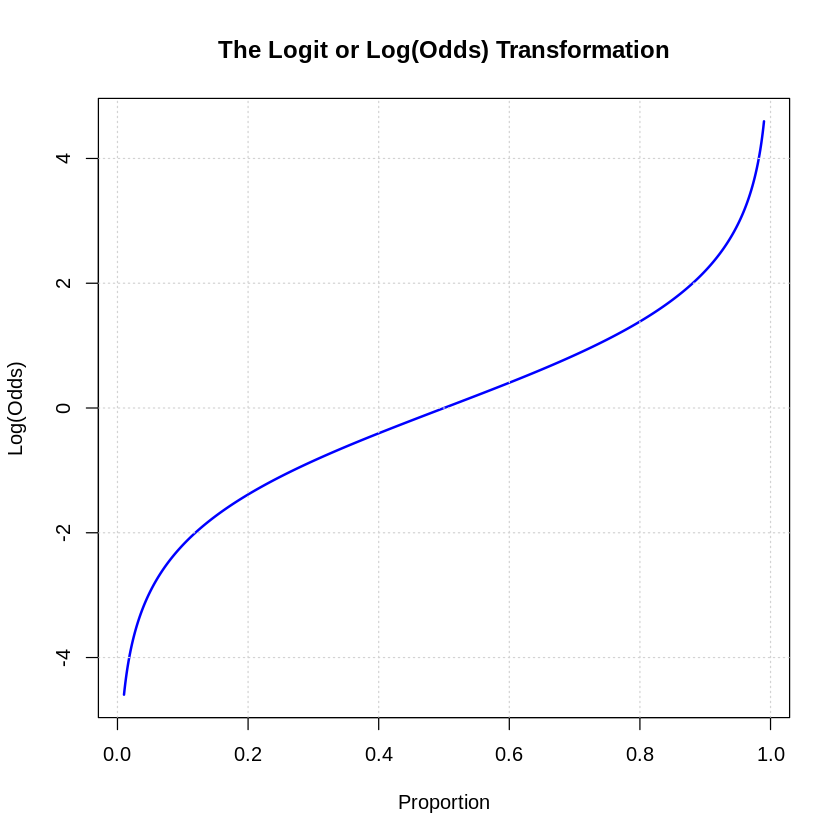

In [1]:
# Define the proportion values ranging from 0.01 to 0.99
proportion <- seq(0.01, 0.99, length.out = 1000)

# Calculate the log(odds) for each proportion
log_odds <- log(proportion / (1 - proportion))

# Plot the log(odds) versus proportion
plot(proportion, log_odds, type = "l", col = "blue", lwd = 2,
     xlab = "Proportion", ylab = "Log(Odds)",
     main = "The Logit or Log(Odds) Transformation")

# Add a grid for better visualization
grid()


**9.2.1 Anesthetic Depth Example**

Thirty patients were given an anesthetic agent that was maintained at a pre-determined [alveolar] concentration for 15 minutes before making an incision. It was then noted whether the patient moved, i.e., jerked or twisted. The interest is in estimating how the probability of jerking or twisting varies with increasing concentration of the anesthetic agent.

The response is best taken as `nomove`, for reasons that will emerge later. There is a small number of concentrations; so we begin by tabulating the proportion that have the `nomove` outcome against concentration.

| Alveolar Concentration | Nomove | 0.8 | 1.0 | 1.2 | 1.4 | 1.6 | 2.5 |
|------------------------|--------|-----|-----|-----|-----|-----|-----|
|                        | 0      | 6   | 4   | 2   | 2   | 0   | 0   |
|                        | 1      | 1   | 1   | 4   | 4   | 4   | 2   |
|   |Total       | 7   | 5   | 6   | 6   | 4   | 2   |

**Table 1: Patients moving (0) and not moving (1), for each of six different alveolar concentrations.**

Figure 24 then displays a plot of these proportions.


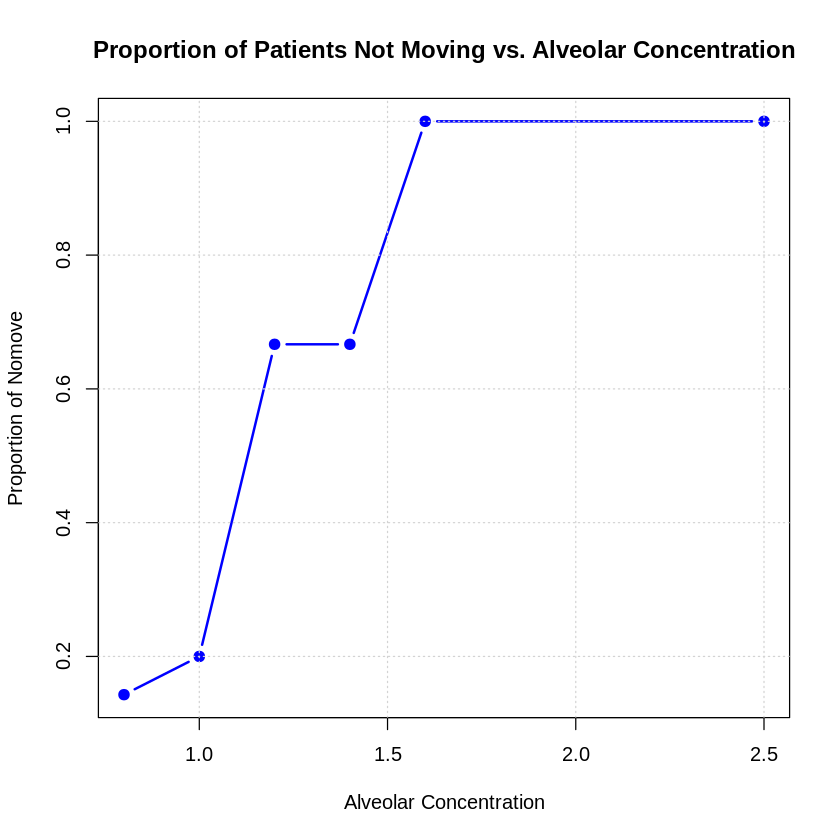

In [2]:
# Data
concentration <- c(0.8, 1.0, 1.2, 1.4, 1.6, 2.5)
nomove <- c(1/7, 1/5, 4/6, 4/6, 4/4, 2/2)

# Plot
plot(concentration, nomove, type = "b", col = "blue", pch = 19, lwd = 2,
     xlab = "Alveolar Concentration", ylab = "Proportion of Nomove",
     main = "Proportion of Patients Not Moving vs. Alveolar Concentration")

# Add a grid
grid()


We fit two models: the logit model and the complementary log-log model. These models can be fitted either directly to the 0/1 data or to the proportions in Table 1. To understand the output, you need to know about “deviances.”

A deviance in logistic regression has a role very similar to the sum of squares in linear regression. Here's a comparison:

| **Regression**          | **Logistic Regression**    |
|-------------------------|----------------------------|
| degrees of freedom      | degrees of freedom         |
| sum of squares          | deviance                   |
| mean sum of squares     | mean deviance              |
| (divide by degrees of freedom) | (divide by degrees of freedom) |

In linear regression, we prefer models with a small mean residual sum of squares. Similarly, in logistic regression, we prefer models with a small mean deviance.


If each person responds independently with the same probability, we're dealing with Bernoulli trials. The assumption of the same probability comes from how individuals are sampled. Even though each person will have different responses, the idea is that each new individual is randomly selected from a larger population. Here's the R code:

In [5]:
anesthetic <- read.csv("/content/anesthetic.csv")
anaes.logit <- glm(nomove ~ conc, family = binomial(link = logit),
 data = anesthetic)

 summary(anaes.logit)


Call:
glm(formula = nomove ~ conc, family = binomial(link = logit), 
    data = anesthetic)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   -6.469      2.418  -2.675  0.00748 **
conc           5.567      2.044   2.724  0.00645 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 41.455  on 29  degrees of freedom
Residual deviance: 27.754  on 28  degrees of freedom
AIC: 31.754

Number of Fisher Scoring iterations: 5


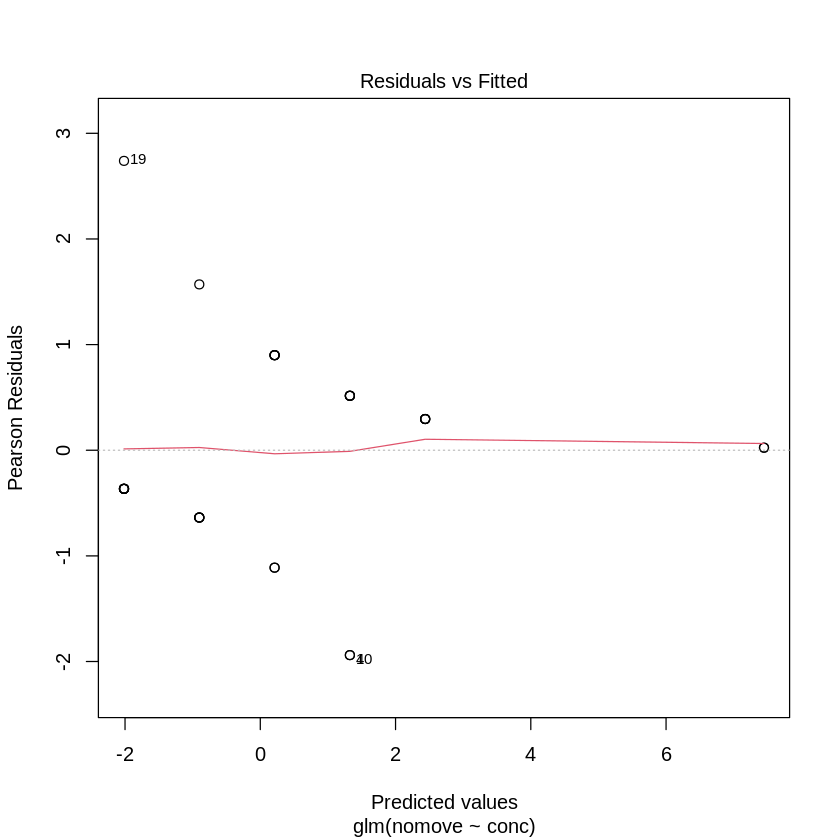

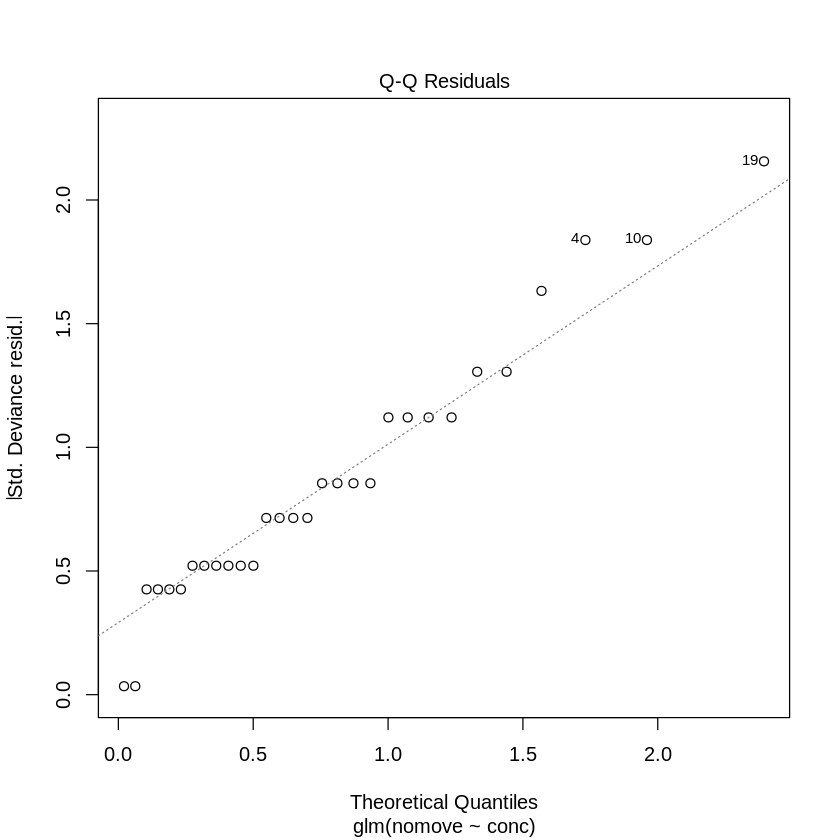

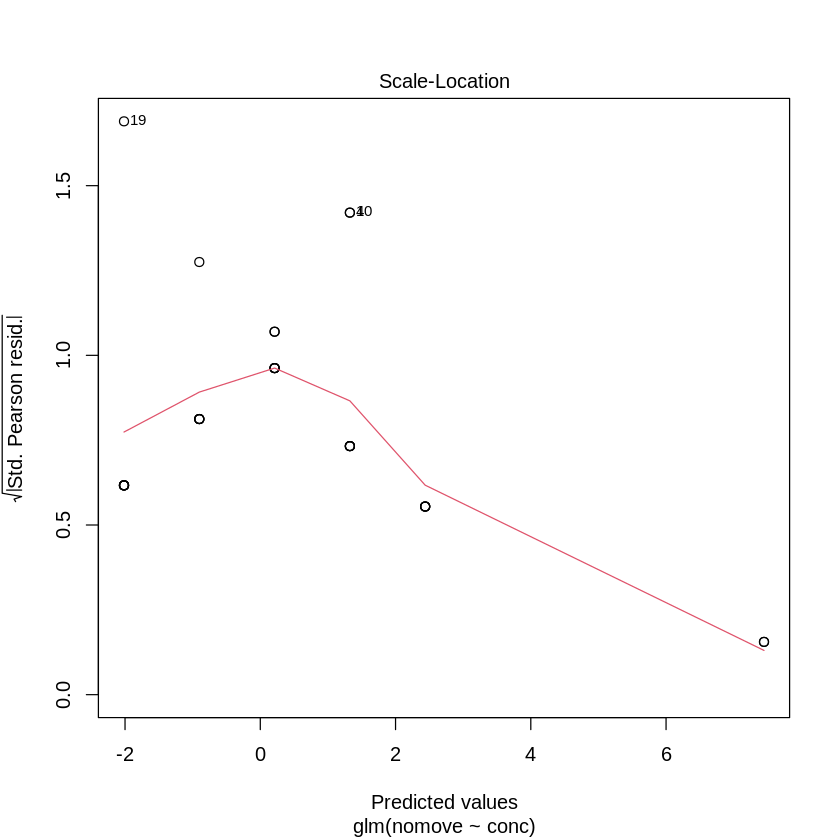

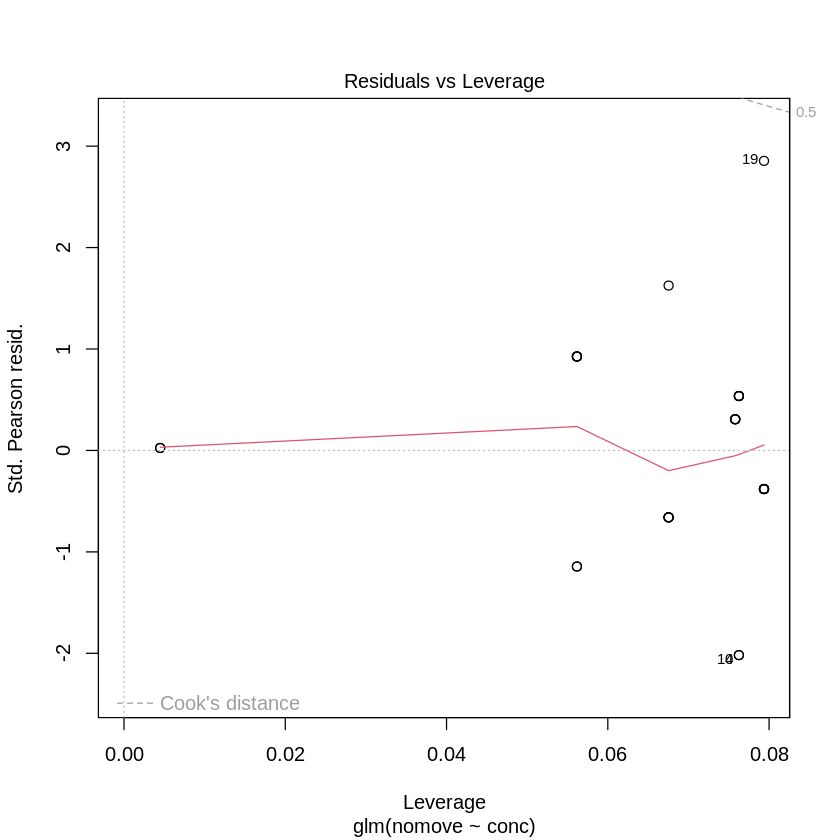

In [6]:
plot(anaes.logit)

# **9.3 glm models (Generalized Linear Regression Modelling)**

In the above we had

anaes.logit <- glm(nomove ~ conc, family = binomial(link = logit),
 data=anesthetic)

 The family parameter specifies the distribution for the dependent variable. There is an optional argument that
allows us to specify the link function. Below we give further examples.

**9.3.2 Data in the form of counts**

Data that consist of counts can often be effectively analyzed using the Poisson family. The commonly used link function here is the log function. The log link transforms positive numbers into values in the range from $-\square to +\square $ that a linear model can predict.


**9.3.3 The gaussian family**

If no family is specified, then the family is taken to be gaussian. The default link is then the identity, as
for an lm model. This way of formulating an lm type model does however have the advantage that one is not
restricted to the identity link

In [7]:
# Dataset airquality, from datasets package
air.glm<-glm(Ozone^(1/3) ~ Solar.R + Wind + Temp, data = airquality)
 # Assumes gaussian family, i.e. normal errors model
summary(air.glm)


Call:
glm(formula = Ozone^(1/3) ~ Solar.R + Wind + Temp, data = airquality)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.2989449  0.5554379  -0.538 0.591547    
Solar.R      0.0022061  0.0005586   3.949 0.000141 ***
Wind        -0.0759672  0.0157661  -4.818 4.80e-06 ***
Temp         0.0500576  0.0061081   8.195 5.86e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2603957)

    Null deviance: 87.209  on 110  degrees of freedom
Residual deviance: 27.862  on 107  degrees of freedom
  (42 observations deleted due to missingness)
AIC: 171.57

Number of Fisher Scoring iterations: 2


# **9.4 Models that Include Smooth Spline Terms**

Here's a simplified explanation in easy-to-understand language:

Splines and other smooth transformations of variables can be used in regression models. You can apply a "smooth" b-spline or n-spline transformation to a column of the X matrix by specifying `bs(x)` or `ns(x)`. These transformations allow flexible modeling of nonlinear relationships in the data.

To adjust the smoothness of the curve, settings can be customized, although the default settings often work well.

To use these transformations in R, you need to install the `splines` package. Currently, R does not have built-in functionality to display plots that illustrate the contribution of each term to the model.

**9.4.1 Dewpoint Data**

The dataset `dewpoint41` contains three columns: `mintemp`, `maxtemp`, and `dewpoint`. The `dewpoint` values represent averages calculated for each combination of `mintemp` and `maxtemp`, aggregated from monthly data across various times and locations.

We model the relationship using the equation:
 **dewpoint** = **mean of dewpoint** + **smooth**(mintemp) + **smooth**(maxtemp)

Removing the mean of `dewpoint` is done for computational convenience and provides more interpretable output. Below are the details of the calculations:



In [19]:
# Load necessary mgcv instead of spline packages
# install.packages("mgcv")
library(mgcv)

# Read the CSV file
dewpoint <- read.csv("/content/dewpoint.csv")

# Check the structure of dewpoint to ensure it's a data frame
str(dewpoint)

# Fit the GAM model with smooth terms
dewpoint_gam <- gam(dewpoint$dewpt ~ s(dewpoint$mintemp) + s(dewpoint$maxtemp), data = dewpoint)

# Print summary of the GAM model
summary(dewpoint_gam)


'data.frame':	72 obs. of  4 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ maxtemp : int  18 18 20 20 20 20 22 22 22 22 ...
 $ mintemp : int  8 10 6 8 10 12 8 10 12 14 ...
 $ dewpt   : int  7 10 5 7 9 12 6 9 11 14 ...



Family: gaussian 
Link function: identity 

Formula:
dewpoint$dewpt ~ s(dewpoint$mintemp) + s(dewpoint$maxtemp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.12500    0.04215   311.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df      F p-value    
s(dewpoint$mintemp) 3.220  4.042 3992.2  <2e-16 ***
s(dewpoint$maxtemp) 6.252  7.420  794.3  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.996   Deviance explained = 99.7%
GCV = 0.14971  Scale est. = 0.12794   n = 72

# **9.5 Survival Analysis**

For example times at which subjects were either lost to the study or died (“failed”) may be recorded for
individuals in each of several treatment groups. Engineering or business failures can be modelled using this
same methodology. The R survival package has state of the art abilities for survival analysis.

# **9.6 Non-linear Models**

You can use nls() (non-linear least squares) to obtain a least squares fit to a non-linear function.


# **9.7 Model Summaries**

Type in

methods(summary)

to get a list of the summary methods that are available. You may want to mix and match, e.g. summary.lm()
on an aov or glm object. The output may not be what you might expect. So be careful!

# **9.8 Further Elaborations**


Generalised Linear Models were developed in the 1970s. They unified a huge range of diverse methodology.
They have now become a stock-in-trade of statistical analysts. Their practical implementation built on the
powerful computational abilities that, by the 1970s, had been developed for handling linear model calculations.
Practical data analysis demands further elaborations. An important elaboration is to the incorporation of more
than one term in the error structure. The R nlme package implements such extensions, both for linear models
and for a wide class of nonlinear models.
Each such new development builds on the theoretical and computational tools that have arisen from earlier
developments. Exciting new analysis tools will continue to appear for a long time yet. This is fortunate. Most
professional users of R will regularly encounter data where the methodology that the data ideally demands is not
yet available.

# **9.9 Exercises**


1. Fit a Poisson regression model to the data in the data frame moths that Accompanies these notes. Allow
different intercepts for different habitats. Use log(meters) as a covariate.


In [26]:
# Assuming 'moths' data frame is already loaded or available

# Load necessary packages
library(lme4)  # for fitting generalized linear mixed models
moths <- read.csv("/content/moths.csv")
# moths
# Check the structure of 'moths' to understand its columns
str(moths)

# Fit Poisson regression model with different intercepts for habitats
poisson_model <- glmer(A ~ meters + (1 | habitat), data = moths, family = poisson)

# Print summary of the model
summary(poisson_model)


'data.frame':	41 obs. of  5 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ meters  : int  25 37 109 10 133 26 4 3 3 27 ...
 $ A       : int  9 3 7 0 9 3 0 0 0 39 ...
 $ P       : int  8 20 9 2 1 18 5 5 2 5 ...
 $ habitat : chr  "NWsoak" "SWsoak" "Lowerside" "Lowerside" ...


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: A ~ meters + (1 | habitat)
   Data: moths

     AIC      BIC   logLik deviance df.resid 
   248.7    253.8   -121.3    242.7       38 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9454 -1.1355 -0.1573  0.8008  3.6643 

Random effects:
 Groups  Name        Variance Std.Dev.
 habitat (Intercept) 0.9082   0.953   
Number of obs: 41, groups:  habitat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 1.260028   0.380916   3.308  0.00094 ***
meters      0.002414   0.002526   0.956  0.33916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
meters -0.329

# **9.10 References**

Dobson, A. J. 1983. An Introduction to Statistical Modelling. Chapman and Hall, London.

Hastie, T. J. and Tibshirani, R. J. 1990. Generalized Additive Models. Chapman and Hall, London.

Maindonald J H and Braun W J 2003. Data Analysis and Graphics Using R – An Example-Based Approach.
Cambridge University Press.

McCullagh, P. and Nelder, J. A., 2nd edn., 1989. Generalized Linear Models. Chapman and Hall.

Venables, W. N. and Ripley, B. D., 2nd edn 1997. Modern Applied Statistics with S-Plus. Springer, New York.